<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/10_ICA_NFM_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 🚀 독립 성분 분석 (ICA)

✅ 개념

          통계적으로 독립적인 성분을 분리하는 기법으로,
          데이터가 여러개의 독립적인 신호가 섞여 있다고 가정하고, 독립 신호를 복원하는 기법

✅ 특징  

          비지도 학습/ 통계적 독립성을 최대 / PCA와
          유사하지만, 독립 성분을 찾는것이 목표

In [1]:
# ⚠️ 경고 메시지 제거
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # UserWarning 경고 숨김|


[*********************100%***********************]  4 of 4 completed


,IC1,IC2,IC3,IC4
Date,,,,
2020-01-03,-0.366473,0.500932,-0.028069,0.492547
2020-01-06,0.355618,-0.323261,-0.203148,1.592188
2020-01-07,0.287683,0.427460,0.185630,0.592229
2020-01-08,-0.978668,-0.956436,-0.056430,-0.465065
2020-01-09,-0.367757,-0.880662,0.525393,0.047602




해석 : IC1 ~ IC4 는 서로 독립적이 요인으로 특정날 독립 성분이 어떤 영향을 미치는 지 보여줌
양수(+) 이면 수익률에 긍정적인 영향/ 음수(-)이면 부정적인 영향, 예를 들어, 2020-01-06의 IC4 값이 1.592160로 크다면, 
이 요인은 해당 날짜의 시장 움직임에 강한 영향을 미친 요인 중 하나일 가능성




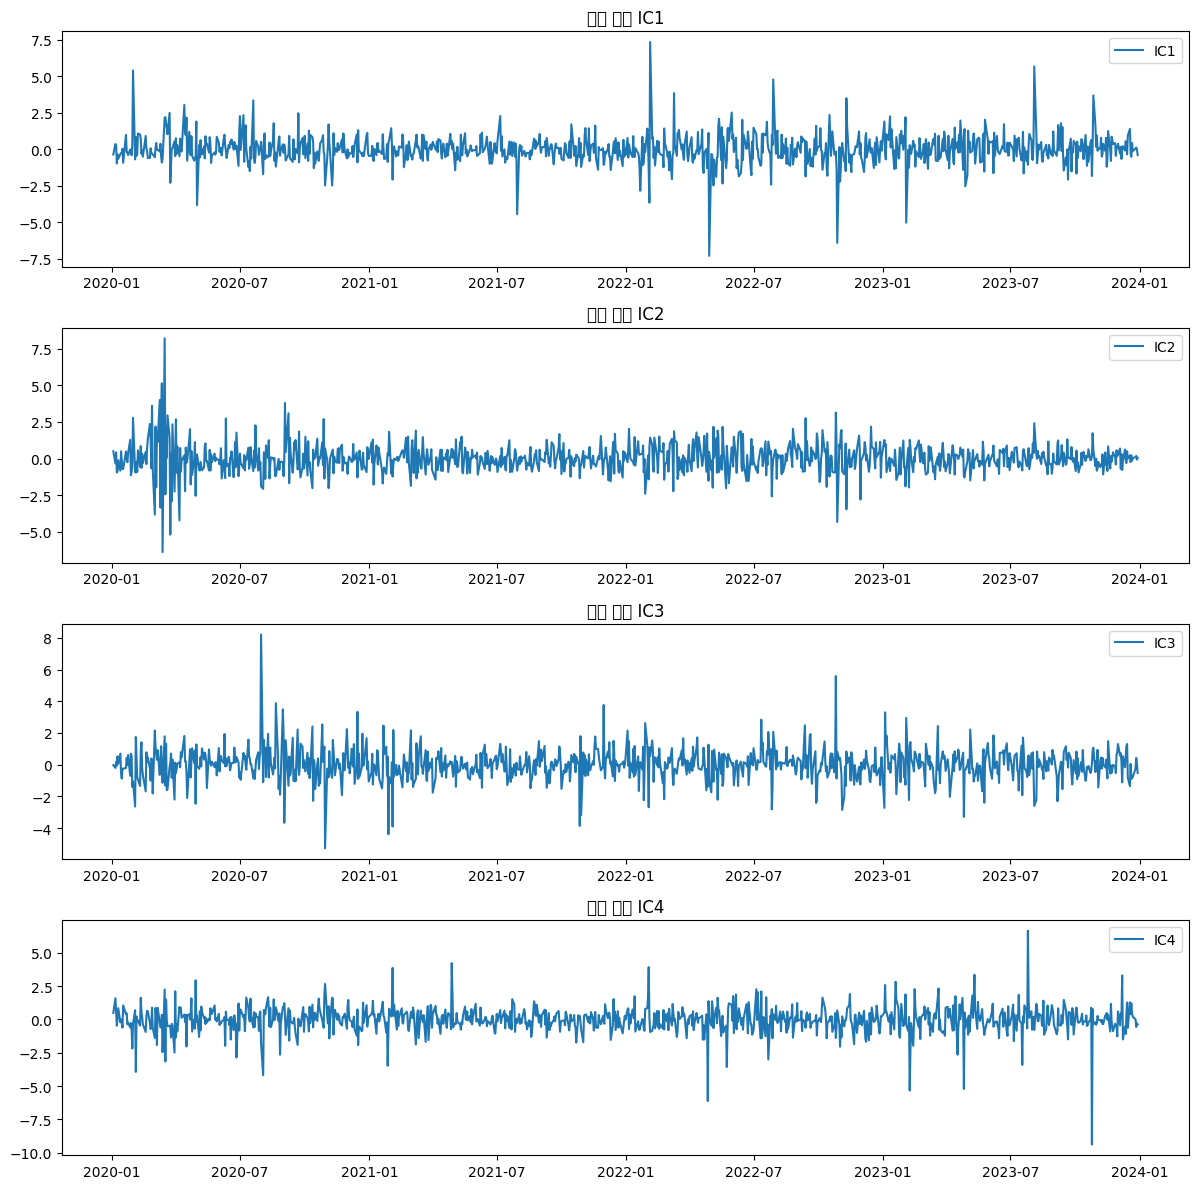


📊 2. 각 독립 성분(Independent Components, IC)의 상세 해석
🔹 IC1: 시장 전반적인 변동성 요인
IC1은 시간이 지나면서 일정한 수준에서 변동을 유지하지만, 간헐적인 급등/급락이 존재함.
2020년 초반과 2022년 초반에 **큰 피크(급등 및 급락)**가 보임.
이는 시장 전체적인 거시경제 요인(예: 글로벌 경제 위기, 금리 인상, 유가 변동 등)과 관련 있을 가능성이 큼.
예상 원인: 2020년 초 → COVID-19 대유행, 2022년 초 → 연준(Fed) 금리 인상.
🔹 IC2: 특정 섹터 또는 기업 주도의 변동성
IC2는 2020년~2021년 초반에 걸쳐 큰 변동성을 보이다가 점차 안정화되는 패턴을 보임.
이는 2020년 이후 코로나로 인한 IT, 헬스케어, 기술 섹터의 급등락과 관련 있을 가능성이 높음.
이후 2022년~2023년에는 변동성이 감소 → 이전의 시장 충격이 어느 정도 해소되고 있음을 의미.
예상 원인: 테크버블 조정, 2020~2021년 주식시장 강세 이후 2022년부터의 조정 국면.
🔹 IC3: 개별 이벤트 중심의 영향 요인
IC3는 특정 기간에 급등락을 보이며, 전체적으로 변동성이 크지 않음.
이는 개별 기업(예: AAPL, MSFT, AMZN, GOOG)의 실적 발표, 경영진 변화, 규제 이슈 등 일회성 이벤트와 관련 있을 가능성이 높음.
특정 날에만 급격한 변동성이 나타나므로, 대형 기업의 뉴스 또는 정책 변화의 영향을 받는 성분으로 해석 가능.
예상 원인: 기업 실적 발표(예: 테슬라, 애플, 마이크로소프트), 반독점 규제 뉴스, CEO 교체 등.
🔹 IC4: 노이즈 또는 기타 경제 심리 요인
IC4는 비교적 고른 변동성을 가지면서도, 2020~2021년과 2023년 후반부에 약간의 급등락이 보임.
이는 특정 금융 이벤트보다도 투자 심리 또는 유동성 관련 요인과 연관이 있을 가능성이 큼.
예를 들어, 시장 참가자의 심리(공포 지수, VIX 변동), 유동성 증가/감소, 특정 매매 전략(퀀트 트레이딩

In [4]:
# 금융데이터 : 주식의 움직임이 특정 요인 (금리, 경기지표, 글로벌 뉴스)와 결합되었기 때문에, ICA를 활용하여 숨겨진 독립적인 요인을 추출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import yfinance as yf

# 분석할 주식 심볼 (S&P 500 대형주 예제)
stocks = ["AAPL", "MSFT", "GOOG", "AMZN"]

# Yahoo Finance에서 주가 데이터 다운로드
data = yf.download(stocks, start="2020-01-01", end="2024-01-01")['Close']

# 로그 수익율 계산
returns = np.log(data / data.shift(1)).dropna()

# ICA 적용
n_components = min(len(returns.columns), 4)
ica = FastICA(n_components = 4, random_state = 24)
independent_components = ica.fit_transform(returns)

ica_df = pd.DataFrame(independent_components, index = returns.index , columns=[f"IC{i+1}" for i in range(4)])

display(ica_df.head(5))
print("")
print("""
해석 : IC1 ~ IC4 는 서로 독립적이 요인으로 특정날 독립 성분이 어떤 영향을 미치는 지 보여줌
양수(+) 이면 수익률에 긍정적인 영향/ 음수(-)이면 부정적인 영향, 예를 들어, 2020-01-06의 IC4 값이 1.592160로 크다면,
이 요인은 해당 날짜의 시장 움직임에 강한 영향을 미친 요인 중 하나일 가능성

""")

plt.figure(figsize=(12, 3 * n_components))  # 그래프 크기 조정
for i, col in enumerate(ica_df.columns):
    plt.subplot(n_components, 1, i + 1)
    plt.plot(ica_df.index, ica_df[col], label=col)
    plt.legend()
    plt.title(f"독립 성분 {col}")

plt.tight_layout()
plt.show()

print("""
📊 2. 각 독립 성분(Independent Components, IC)의 상세 해석
🔹 IC1: 시장 전반적인 변동성 요인
IC1은 시간이 지나면서 일정한 수준에서 변동을 유지하지만, 간헐적인 급등/급락이 존재함.
2020년 초반과 2022년 초반에 **큰 피크(급등 및 급락)**가 보임.
이는 시장 전체적인 거시경제 요인(예: 글로벌 경제 위기, 금리 인상, 유가 변동 등)과 관련 있을 가능성이 큼.
예상 원인: 2020년 초 → COVID-19 대유행, 2022년 초 → 연준(Fed) 금리 인상.
🔹 IC2: 특정 섹터 또는 기업 주도의 변동성
IC2는 2020년~2021년 초반에 걸쳐 큰 변동성을 보이다가 점차 안정화되는 패턴을 보임.
이는 2020년 이후 코로나로 인한 IT, 헬스케어, 기술 섹터의 급등락과 관련 있을 가능성이 높음.
이후 2022년~2023년에는 변동성이 감소 → 이전의 시장 충격이 어느 정도 해소되고 있음을 의미.
예상 원인: 테크버블 조정, 2020~2021년 주식시장 강세 이후 2022년부터의 조정 국면.
🔹 IC3: 개별 이벤트 중심의 영향 요인
IC3는 특정 기간에 급등락을 보이며, 전체적으로 변동성이 크지 않음.
이는 개별 기업(예: AAPL, MSFT, AMZN, GOOG)의 실적 발표, 경영진 변화, 규제 이슈 등 일회성 이벤트와 관련 있을 가능성이 높음.
특정 날에만 급격한 변동성이 나타나므로, 대형 기업의 뉴스 또는 정책 변화의 영향을 받는 성분으로 해석 가능.
예상 원인: 기업 실적 발표(예: 테슬라, 애플, 마이크로소프트), 반독점 규제 뉴스, CEO 교체 등.
🔹 IC4: 노이즈 또는 기타 경제 심리 요인
IC4는 비교적 고른 변동성을 가지면서도, 2020~2021년과 2023년 후반부에 약간의 급등락이 보임.
이는 특정 금융 이벤트보다도 투자 심리 또는 유동성 관련 요인과 연관이 있을 가능성이 큼.
예를 들어, 시장 참가자의 심리(공포 지수, VIX 변동), 유동성 증가/감소, 특정 매매 전략(퀀트 트레이딩)과의 연관성이 있을 수 있음.
예상 원인: 유동성 변화, 변동성 장세, 헤지펀드 및 기관 투자자의 대규모 주문.


""")


In [19]:
## WINE 독립성분 분석 예제
# 데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine
load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print("feature {}개, data {}개".format(X.shape[1], X.shape[0]))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns)

from sklearn.decomposition import FastICA
best = 5
wine_ica = FastICA(n_components=best, algorithm='parallel', fun='logcosh', random_state=42)
ica_res = wine_ica.fit_transform(scaled_X)

display(pd.DataFrame(ica_res, columns = [f"IC_{i+1}" for i in range(best)]).head(5))

print("""
ICA는 데이터를 원래 13개의 특성을 5개의 주요 독립 성분으로 변환

IC1 ~ IC5	해석 가능성
IC1	: 와인의 전반적인 풍미(flavors) 또는 알코올 함량과 관련된 주요 요인
IC2	: 와인의 산도(acidity), pH, 타닌(tannins)과 관련된 요인
IC3	: 색상(color intensity), 페놀 성분(phenols)과 관련된 요인
IC4	: 당도(sweetness) 또는 숙성 연도(aging years)와 관련된 요인
IC5	: 기타 잔여 요인 (예: 와인의 희석 정도, 기타 화합물의 영향)

IC1은 IC3과 IC5가 높기 때문에, 와인의 색상과 풍미가 강한편
index 1은 IC_4가 높기 때문에 당고가 높고 오래된 와인 일 수 있음
""")

feature 13개, data 178개


,IC_1,IC_2,IC_3,IC_4,IC_5
0,0.070733,0.916263,0.867552,-0.116910,1.481150
1,0.356688,0.278545,-0.147824,1.684841,1.013162
2,-0.679651,0.523098,-0.394678,-0.949925,1.136557
3,-0.424316,1.839446,-0.321185,-0.317582,1.661673
4,0.325326,0.039294,0.404530,-1.775029,0.474451



ICA는 데이터를 원래 13개의 특성을 5개의 주요 독립 성분으로 변환 

IC1 ~ IC5	해석 가능성
IC1	: 와인의 전반적인 풍미(flavors) 또는 알코올 함량과 관련된 주요 요인
IC2	: 와인의 산도(acidity), pH, 타닌(tannins)과 관련된 요인
IC3	: 색상(color intensity), 페놀 성분(phenols)과 관련된 요인
IC4	: 당도(sweetness) 또는 숙성 연도(aging years)와 관련된 요인
IC5	: 기타 잔여 요인 (예: 와인의 희석 정도, 기타 화합물의 영향)

IC1은 IC3과 IC5가 높기 때문에, 와인의 색상과 풍미가 강한편 
index 1은 IC_4가 높기 때문에 당고가 높고 오래된 와인 일 수 있음



In [17]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### 🚀 음수 미포함 행렬 분해

✅ 개념

          데이터와 구성요소가 음수가 아니라고 가정하게 진행
          X를 음수를 포함하지 않는 두개의 행렬 W/H로 분해
          X와 행렬 WH 사이의 거리인 d를 최적화
✅ 특징  

          음수를 포함하지 않으면서 의미 있는 패턴 추출
          Feature는 상관분석

🔹 NMF 변환 후 데이터 (W 행렬)
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.100272   0.022472   0.521380   0.129847   0.186415
1   0.080516   0.000000   0.426428   0.158223   0.000000
2   0.101671   0.076318   0.406422   0.133477   0.214419
3   0.089299   0.074853   0.653798   0.026333   0.131061
4   0.087949   0.101499   0.277302   0.222114   0.353247


W 행령 해석 
    - 0,1,2,3번은 Feature 3에 많은 영향을 받음 
    - 4번 화인은 Feature 5에 가장 많은 영향을 받음 



🔹 NMF 계수 행렬 (H 행렬)

각 Feature들 얼마나 원래 변수와 강한 연관을 가지는지가 나타남 

            alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
Feature_1  0.846184    1.727724  0.735538           0.805126   0.000000   
Feature_2  1.192959    1.752790  0.860318           0.923746   0.297070   
Feature_3  1.197316    0.000000  0.530731           0.000000   0.571268   
Feature_4  0.169960    0.000000  0.493669           0.494452   0.000000   
Feature_5  0.000000    0.000000  0.876470           1.050004   0.778696   

           total_phenols  flavanoi

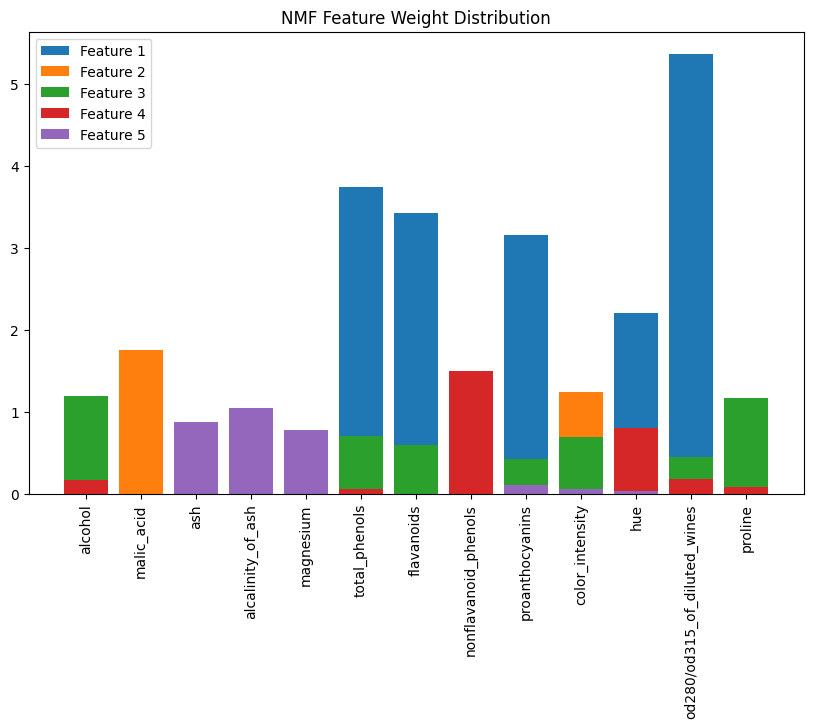

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_wine

# 1️⃣ 와인 데이터 로드
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# 2️⃣ 음수 데이터 방지 → MinMax 정규화 (NMF는 음수 포함 불가)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ NMF 적용 (특성 개수를 5개로 축소)
n_components = 5
nmf = NMF(n_components=n_components, random_state=42)
W = nmf.fit_transform(X_scaled)  # 기저 행렬
H = nmf.components_  # 계수 행렬

# 4️⃣ NMF 결과를 DataFrame으로 변환
# 기저 행렬 : 각 와인 샘플이 Feature 1~5와 얼마나 연관이 있는지, (당도, 산도, 바디감 등)
W_df = pd.DataFrame(W, columns=[f"Feature_{i+1}" for i in range(n_components)])

# 계수 행렬 : 원본 변수가 NMF 특성과 어떻게 연결되는지 나타남 (특성성분이 + 이면 그 특성을 강하게 반)
H_df = pd.DataFrame(H, columns=X.columns, index=[f"Feature_{i+1}" for i in range(n_components)])

# 5️⃣ 결과 출력
print("🔹 NMF 변환 후 데이터 (W 행렬)")
print(W_df.head())
print()
print("""
W 행령 해석
    - 0,1,2,3번은 Feature 3에 많은 영향을 받음
    - 4번 화인은 Feature 5에 가장 많은 영향을 받음
""")
print()
print("\n🔹 NMF 계수 행렬 (H 행렬)")
print("""
각 Feature들 얼마나 원래 변수와 강한 연관을 가지는지가 나타남
""")
print(H_df)

# 6️⃣ 성분 가중치 시각화
plt.figure(figsize=(10, 6))
for i in range(n_components):
    plt.bar(X.columns, H[i], label=f"Feature {i+1}")
plt.xticks(rotation=90)
plt.legend()
plt.title("NMF Feature Weight Distribution")
plt.show()


#### 🚀 다차원 척도법

✅ 개념

          원래 데이터의 고차원 공간의 거리를 설명

*   고차원 >> 저차원 (2,3차원)으로 변환 하여 거리를 설명
*   데이터 간의 상대적 거리 (유사도)를 보존하면서 차원 축소
*   상대적 거리를 정확도를 높이기 위해 stree값으로 나타나며, Stree 값을 최소하는 모형을 최종 모형으로 선정


#### 📊 MDS의 핵심 개념

| 용어 | 설명 |
|------|----------------------------------------------------|
| **고차원 공간** | 원래 데이터가 존재하는 공간 (예: 100차원) |
| **저차원 공간** | 변환된 공간 (보통 2차원 또는 3차원) |
| **Stree 값 (Stress Value)** | 축소된 데이터의 거리와 원래 데이터 거리 간의 차이를 측정하는 값 |
| **Stree 공식** |  $ \text{Stress} = \frac{\sum (\text{축소된 데이터 거리} - \text{실제 데이터 거리})^2}{\sum \text{실제 데이터 거리}^2} $ |
|
| **해석 기준** | Stree 값이 **0에 가까울수록 적합도가 높음** |

📌 Stree 값 해석

         Stree = 0 → 완벽한 적합도 (고차원 거리와 저차원 거리가 완전히 일치)
         Stree ≤ 0.1 → 매우 좋은 모델 (Good)
         0.1 ≤ Stree ≤ 0.15 → 보통 (Moderate)
         Stree ≥ 0.15 → 거리 정보 손실이 커서 좋지 않음 (Bad)


✅ 특징  

        Metric MDS (계량적) - 구간/비율 (유클리드 거리 행령 계산)
        Nonmetric MDS (비계량적) - 서열 (개체 간의 순서를 거리로 속성 변환)
        scikit-learn : metric = True 이면 계량적

   dims    stress
0     2  0.230157
1     3  0.144216
2     4  0.101535
3     5  0.071671
4     6  0.052623


stree값이 0.1 이하가 가장 적절한 것으로 판단하기 때문에, 차원을 5로 선정하여 MDS를 적용 




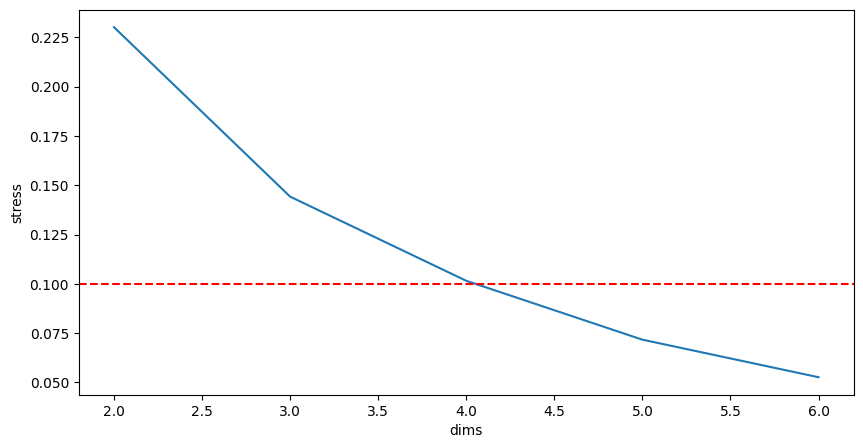

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.metrics import pairwise_distances #거리 계산 함수
import seaborn as sns

# 1️⃣ 와인 데이터 로드
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# 2️⃣ 데이터 표준화 (MDS는 거리 기반 → 표준화 필요)
ss = StandardScaler()
scaled_x = pd.DataFrame(ss.fit_transform(X) , columns = X.columns)

# 3️⃣ 데이터간의 실제 거리 계산하기
distance = pairwise_distances(scaled_x) # metric = 'euclidean'

# 4️⃣ 최적의 차원 수

lst = []
for i in range(2,7) :
  mds = MDS(n_components= i, metric = True , random_state= 0)
  mds.fit(scaled_x)

  stress = mds.stress_
  kruskal_stress = np.sqrt(stress / (0.5 * np.sum(distance ** 2)))
  lst.append([i,kruskal_stress])
  stress_df = pd.DataFrame(lst, columns = ['dims','stress'])
print(stress_df)

plt.figure(figsize = (10,5))
sns.lineplot(x = 'dims', y = 'stress', data= stress_df)
plt.axhline(y= 0.1, color ='r', linestyle = '--')
print("""

stree값이 0.1 이하가 가장 적절한 것으로 판단하기 때문에, 차원을 5로 선정하여 MDS를 적용

""")

2140.760279807434
Kruscal Streess : 0.00011291806281071632

기본 stress 값 : 원본 거리와 축소된 거리간의 제곱 차이의 합이 2112으로 절대값으로 크기만 해석이 어렵지만, 
Kruscal Stres값이 0.1 이하로 좋은 변환 결과를 가지고 있어, MDS 변환이 원본 데이터의 거리 정보를 잘 유지 하고 있다. 
✔ 만약 Kruskal Stress 값이 0.15 이상이었다면 변환이 부적절하므로 다른 방법(PCA, t-SNE) 고려


일부 데이터 포인터가 겹쳐 보이지만, 클러스터링 구조가 약하게 형성됨 , Target값들이 유사한 영역에 모이는
경향이 있지만, 완벽한 클러스터링은 아님 



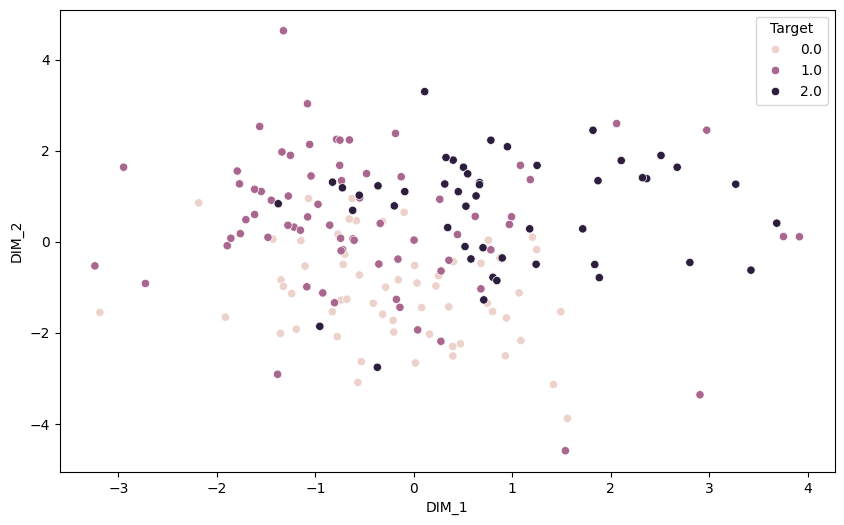

In [52]:
best = 5

mds_5 = MDS(n_components= best, metric = True)

MDS_result = pd.DataFrame(mds_5.fit_transform(scaled_x) )

# MDS 변환 후 저차원 좌표를 저장 > 데이터간 쌍별 거래 행렬 계산
# scaled_x 거리 행렬과 비교할 MDS 축소 데이터의 거래 행렬 계
reduced_d = pairwise_distances(mds_5.embedding_)

print(mds_5.stress_)
print(f"Kruscal Streess : {np.sqrt(mds_5.stress_) / (0.5 * np.sum(reduced_d **2))}")
print("""
기본 stress 값 : 원본 거리와 축소된 거리간의 제곱 차이의 합이 2112으로 절대값으로 크기만 해석이 어렵지만,
Kruscal Stres값이 0.1 이하로 좋은 변환 결과를 가지고 있어, MDS 변환이 원본 데이터의 거리 정보를 잘 유지 하고 있다.
✔ 만약 Kruskal Stress 값이 0.15 이상이었다면 변환이 부적절하므로 다른 방법(PCA, t-SNE) 고려
""")

# 시각화
# np.c_ 함수 : 두 개 이상의 배열을 열 기준으로 병합
reduced_data = pd.DataFrame(np.c_[MDS_result.values, y], columns = [f"DIM_{i+1}" for i in range(best)] + ['Target'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'DIM_1', y = 'DIM_2', data = reduced_data, hue = 'Target')


print("""
일부 데이터 포인터가 겹쳐 보이지만, 클러스터링 구조가 약하게 형성됨 , Target값들이 유사한 영역에 모이는
경향이 있지만, 완벽한 클러스터링은 아님
""")

In [ ]:
ㅇ